## **Prerequisities**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammadamireshraghi/blood-cell-cancer-all-4class")

print("Path to dataset files:", path)

100%|██████████| 1.68G/1.68G [00:16<00:00, 107MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class/versions/1


In [ ]:
!unzip major1.zip

Archive:  major1.zip
  inflating: Benign/Sap_013 (1).jpg  
  inflating: Benign/Sap_013 (10).jpg  
  inflating: Benign/Sap_013 (11).jpg  
  inflating: Benign/Sap_013 (12).jpg  
  inflating: Benign/Sap_013 (13).jpg  
  inflating: Benign/Sap_013 (14).jpg  
  inflating: Benign/Sap_013 (15).jpg  
  inflating: Benign/Sap_013 (16).jpg  
  inflating: Benign/Sap_013 (17).jpg  
  inflating: Benign/Sap_013 (18).jpg  
  inflating: Benign/Sap_013 (19).jpg  
  inflating: Benign/Sap_013 (2).jpg  
  inflating: Benign/Sap_013 (20).jpg  
  inflating: Benign/Sap_013 (21).jpg  
  inflating: Benign/Sap_013 (23).jpg  
  inflating: Benign/Sap_013 (24).jpg  
  inflating: Benign/Sap_013 (25).jpg  
  inflating: Benign/Sap_013 (26).jpg  
  inflating: Benign/Sap_013 (27).jpg  
  inflating: Benign/Sap_013 (28).jpg  
  inflating: Benign/Sap_013 (29).jpg  
  inflating: Benign/Sap_013 (3).jpg  
  inflating: Benign/Sap_013 (30).jpg  
  inflating: Benign/Sap_013 (31).jpg  
  inflating: Benign/Sap_013 (32).jpg  
  infla

# Importing All Modules

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Importing Data**

In [ ]:
os.listdir("/content/Benign")

['Snap_022 (2).jpg',
 'Snap_050.jpg',
 'Snap_101 (3).jpg',
 'Snap_129 (2).jpg',
 'Snap_052 (3).jpg',
 'Snap_068.jpg',
 'Snap_099 (3).jpg',
 'Snap_165.jpg',
 'Snap_024 (4).jpg',
 'Snap_031 (4).jpg',
 'Snap_135 (2).jpg',
 'Snap_090 (3).jpg',
 'Snap_055 (3).jpg',
 'Snap_059 (3).jpg',
 'Snap_100.jpg',
 'Snap_123 (3).jpg',
 'Sap_013 (8).jpg',
 'Snap_063 (2).jpg',
 'Snap_011 (3).jpg',
 'Snap_016 (3).jpg',
 'Snap_065 (3).jpg',
 'Snap_104 (2).jpg',
 'Snap_102 (2).jpg',
 'Snap_061 (3).jpg',
 'Snap_068 (3).jpg',
 'Snap_109.jpg',
 'Snap_018.jpg',
 'Snap_066.jpg',
 'Snap_117.jpg',
 'Snap_121 (2).jpg',
 'Sap_013 (41).jpg',
 'Snap_076 (2).jpg',
 'Snap_109 (2).jpg',
 'Sap_013 (5).jpg',
 'Sap_013 (25).jpg',
 'Snap_045 (3).jpg',
 'Snap_009 (2).jpg',
 'Snap_018 (3).jpg',
 'Sap_013 (38).jpg',
 '[Malignant] Pre-B',
 'Snap_118 (3).jpg',
 'Snap_104.jpg',
 'Sap_013 (39).jpg',
 'Snap_036 (2).jpg',
 'Snap_122.jpg',
 'Snap_011.jpg',
 'Snap_003 (2).jpg',
 'Snap_035.jpg',
 'Snap_111 (3).jpg',
 'Snap_007.jpg',
 'S

In [ ]:
path_main = "/content/Benign"
for folder in os.listdir(path_main):
    # Check if the current item is a directory before proceeding
    if os.path.isdir(os.path.join(path_main, folder)):
        list_of_elements = os.listdir(os.path.join(path_main, folder))

        print(f'Folder: {folder}\n')
        print(f'Number of elements: {len(list_of_elements)}\n')
        print(f'First item\'s name: {list_of_elements[0]}\n')
        print('***************************')
    else:
        # If it's not a directory, you might want to handle it differently
        # For example, you could print a message or skip it
        print(f'{folder} is not a directory, skipping...')

Snap_022 (2).jpg is not a directory, skipping...
Snap_050.jpg is not a directory, skipping...
Snap_101 (3).jpg is not a directory, skipping...
Snap_129 (2).jpg is not a directory, skipping...
Snap_052 (3).jpg is not a directory, skipping...
Snap_068.jpg is not a directory, skipping...
Snap_099 (3).jpg is not a directory, skipping...
Snap_165.jpg is not a directory, skipping...
Snap_024 (4).jpg is not a directory, skipping...
Snap_031 (4).jpg is not a directory, skipping...
Snap_135 (2).jpg is not a directory, skipping...
Snap_090 (3).jpg is not a directory, skipping...
Snap_055 (3).jpg is not a directory, skipping...
Snap_059 (3).jpg is not a directory, skipping...
Snap_100.jpg is not a directory, skipping...
Snap_123 (3).jpg is not a directory, skipping...
Sap_013 (8).jpg is not a directory, skipping...
Snap_063 (2).jpg is not a directory, skipping...
Snap_011 (3).jpg is not a directory, skipping...
Snap_016 (3).jpg is not a directory, skipping...
Snap_065 (3).jpg is not a directory, 

# **Images** **Plotting**

In [ ]:
Benign_path = "/content/Benign"
malignant_pre_B_path = "/content/Benign/[Malignant] Pre-B"
malignant_pro_B_path = "/content/Benign/[Malignant] Pro-B"


In [ ]:
def plot_imgs(item_dir,num_imgs=15):
    all_item_dirs = os.listdir(item_dir)
    item_files=[os.path.join(item_dir,file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10,10))
    for idx,img_path in enumerate (item_files):
        plt.subplot(5,5,idx+1)
        img=plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

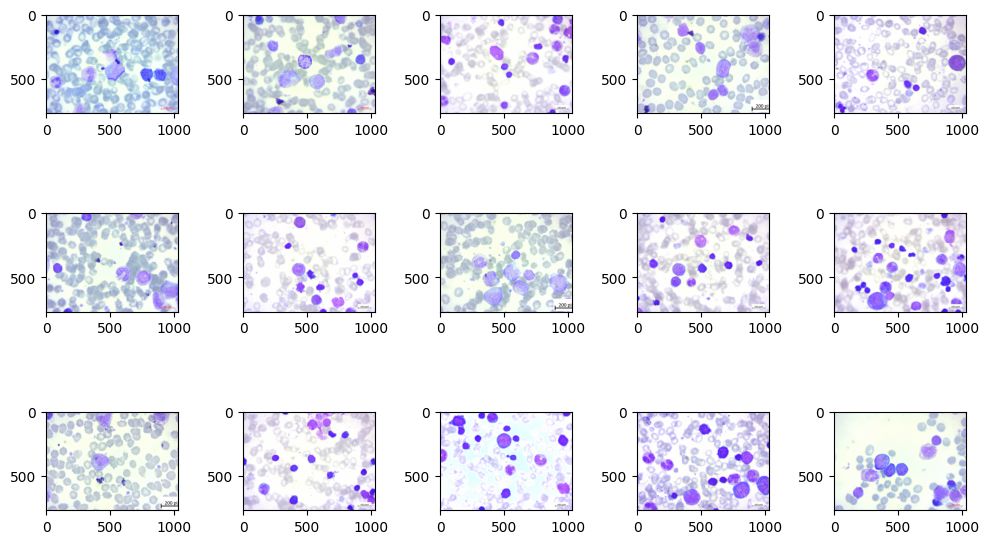

In [ ]:
plot_imgs(Benign_path,num_imgs=15)


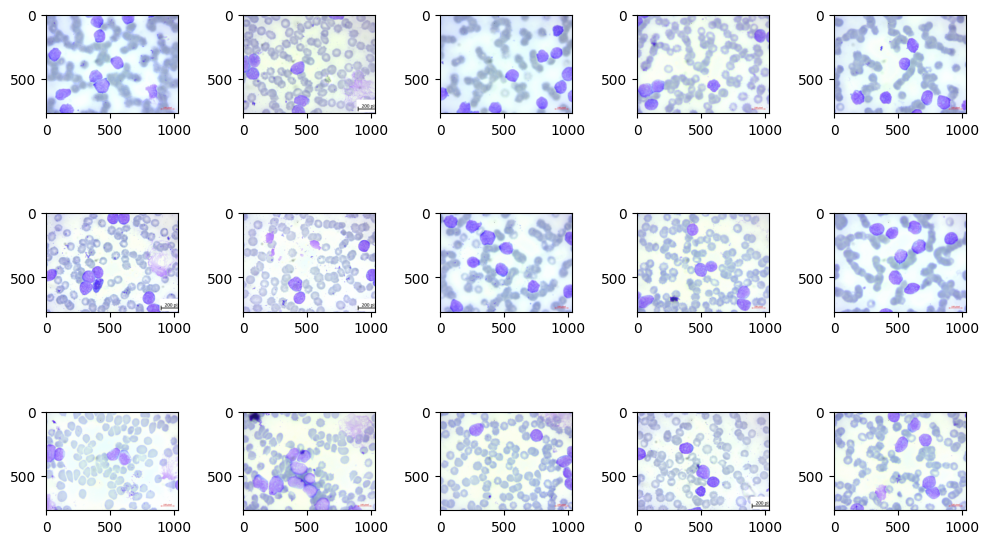

In [ ]:
plot_imgs(malignant_pre_B_path,num_imgs=15)

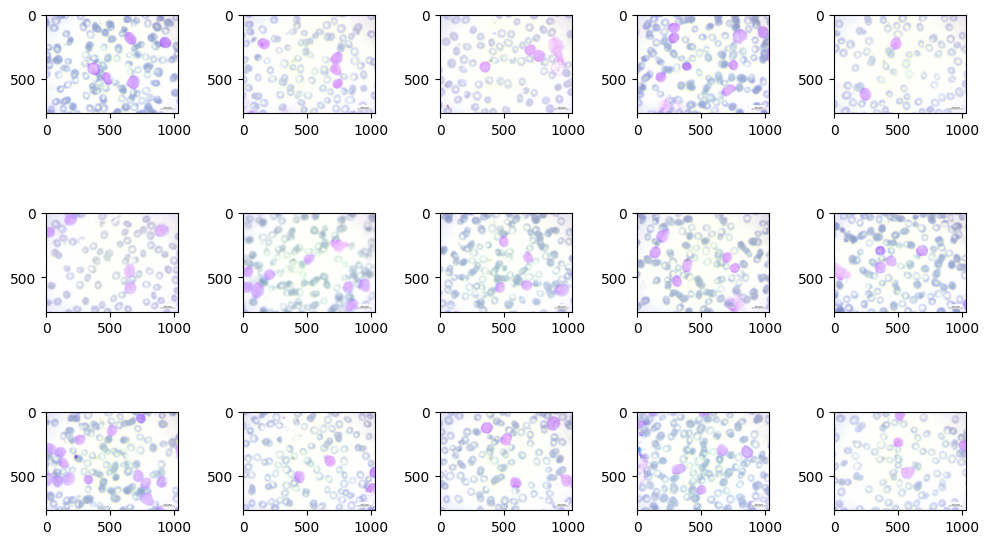

In [ ]:
plot_imgs(malignant_pro_B_path,num_imgs=15)

In [ ]:
Benign_dir = ['/content/Benign']
Malignant_Pre_B_dirs = ['/content/Benign/[Malignant] Pre-B']
Malignant_Pro_B_dirs =['/content/Benign/[Malignant] Pro-B']
filepaths = []
labels = []
dict_lists = [Benign_dir, Malignant_Pre_B_dirs,Malignant_Pro_B_dirs]
class_labels = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B']
for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
bloodCell_data = pd.concat([Fseries, Lseries], axis=1)
bloodCell_df = pd.DataFrame(bloodCell_data)
print(bloodCell_df.head())
print(bloodCell_df["labels"].value_counts())

                          filepaths  labels
0  /content/Benign/Snap_022 (2).jpg  Benign
1      /content/Benign/Snap_050.jpg  Benign
2  /content/Benign/Snap_101 (3).jpg  Benign
3  /content/Benign/Snap_129 (2).jpg  Benign
4  /content/Benign/Snap_052 (3).jpg  Benign
labels
Malignant_Pre-B    955
Malignant_Pro-B    797
Benign             514
Name: count, dtype: int64


# **Data Training**

In [ ]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)

(1812, 2)
(680, 2)
(454, 2)


# **Data Augmentation**

In [ ]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)


train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=8,
                                      shuffle=False
                                     )


test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(224,224),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=8,
                                     shuffle= False
                                    )


val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(224,224),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=8,
                                    shuffle=False
                                   )

Found 1809 validated image filenames belonging to 3 classes.
Found 680 validated image filenames belonging to 3 classes.
Found 454 validated image filenames belonging to 3 classes.


In [ ]:
classes=list(train.class_indices.keys())
print (classes)

['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B']


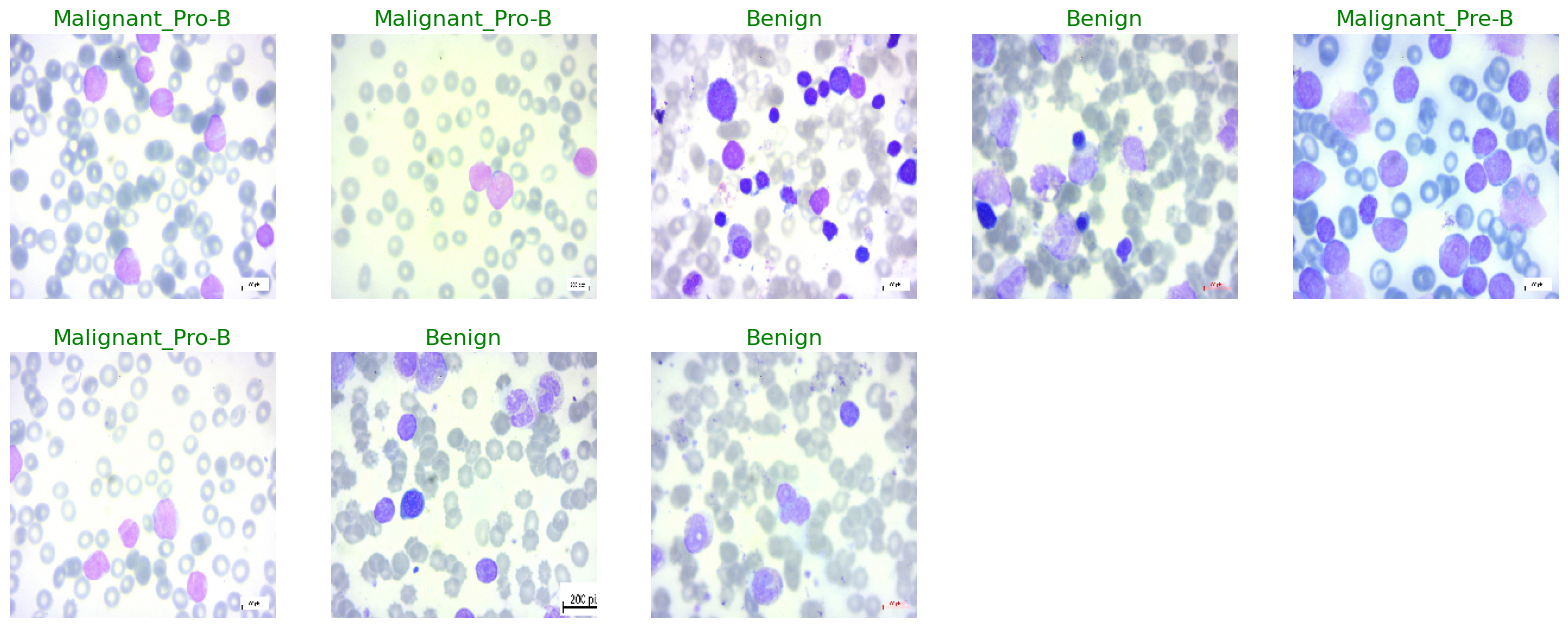

In [ ]:
def show_Blood_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()
show_Blood_images(train)

# **Model**

In [ ]:
vgg_model=VGG19(weights="imagenet",include_top=False,input_shape=(224,224,3))

model=Sequential()

model.add(vgg_model)

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))


model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(4,activation="softmax"))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,034,692 (126.02 MB)

 Trainable params: 33,034,692 (126.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Dense(3, activation="softmax"))

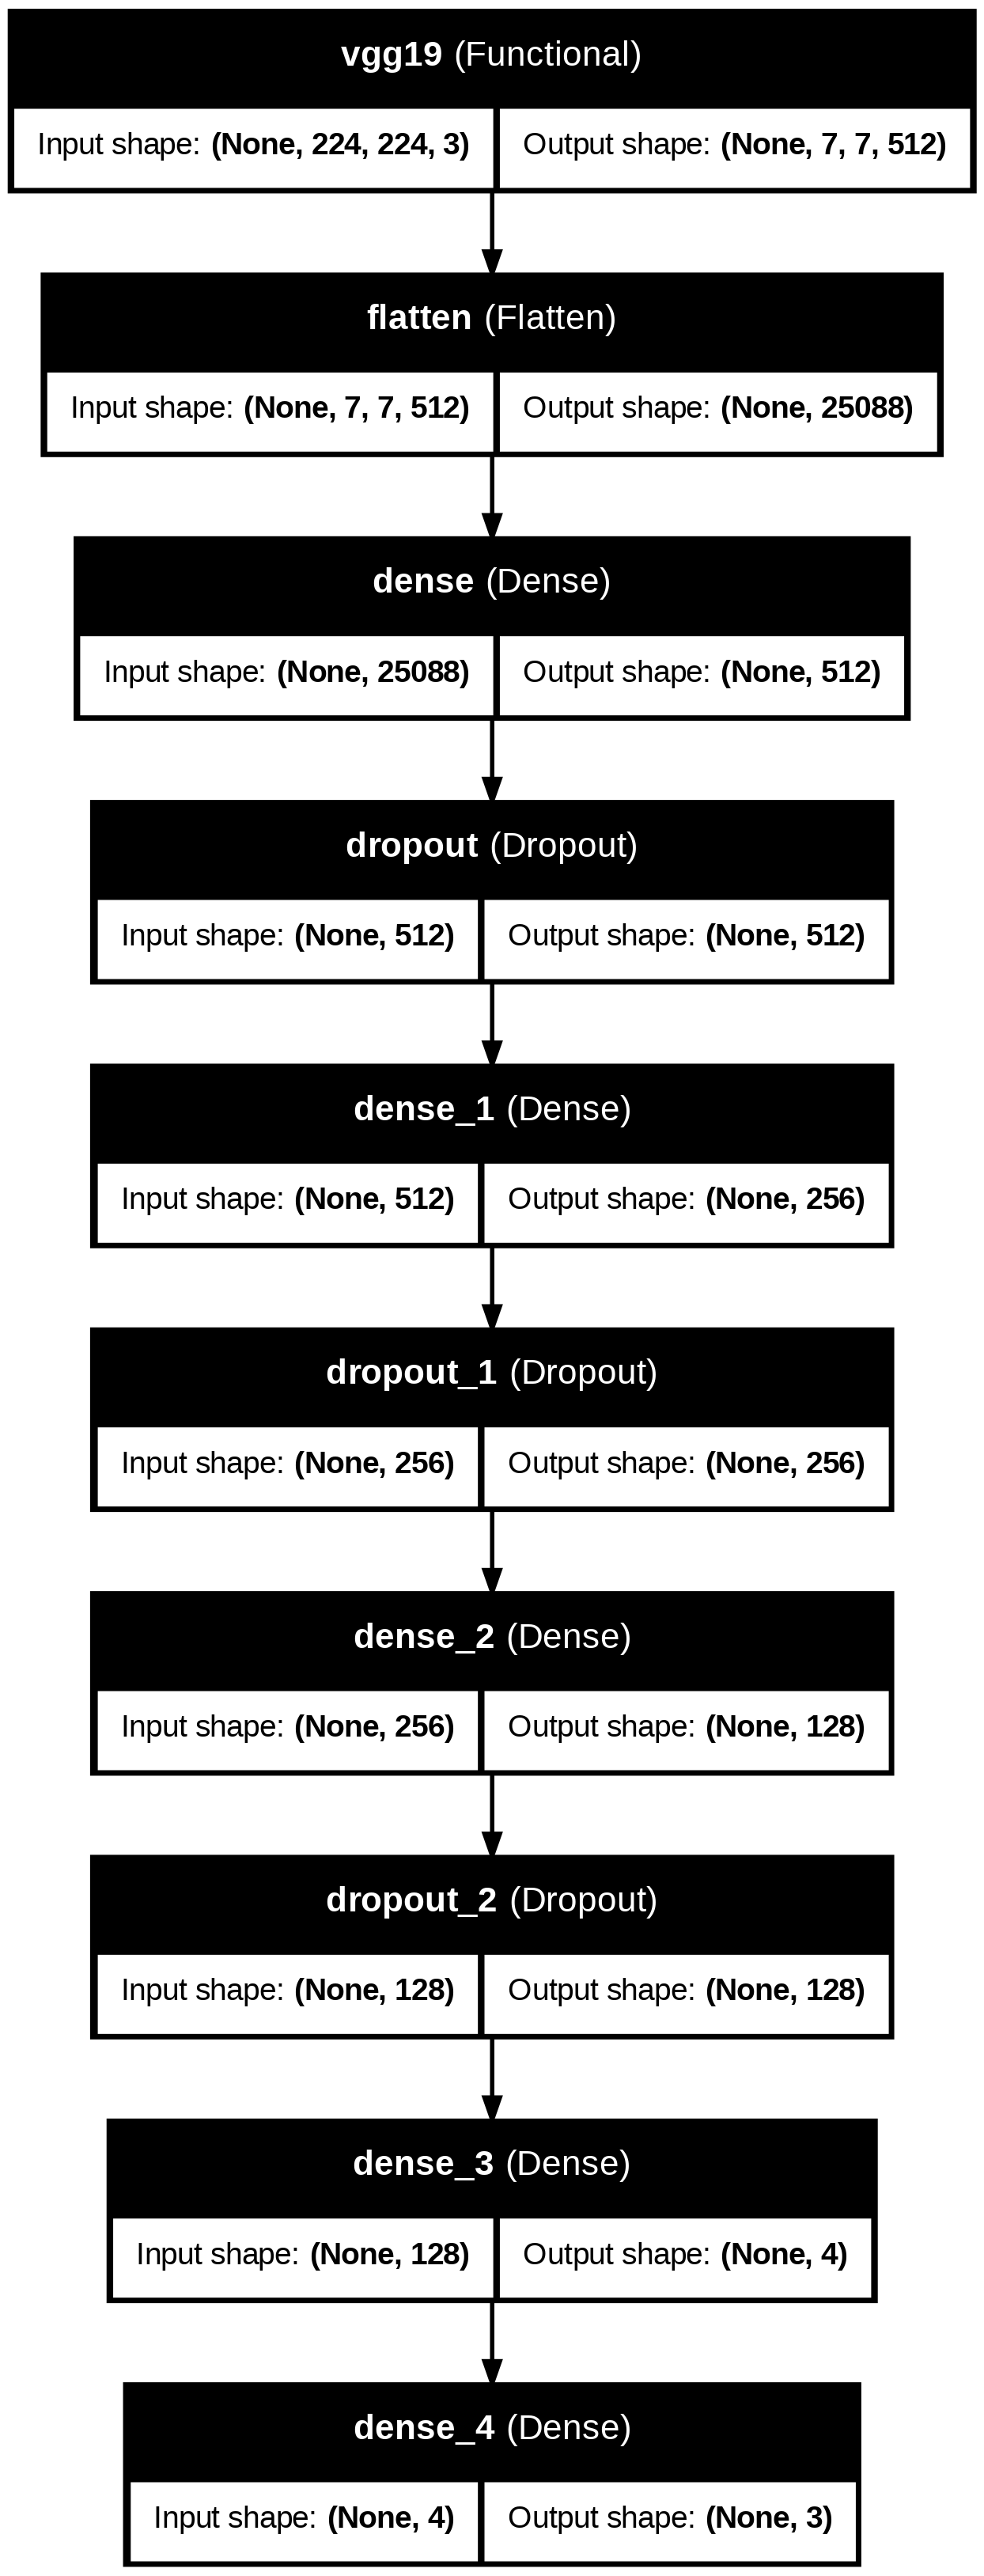

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test, verbose=1)

85/85 ━━━━━━━━━━━━━━━━━━━━ 550s 6s/step - accuracy: 0.3701 - loss: 1.0734


[1.0790668725967407, 0.36764705181121826]

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

85/85 ━━━━━━━━━━━━━━━━━━━━ 550s 6s/step


In [61]:
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

                 precision    recall  f1-score   support

         Benign       0.00      0.00      0.00       168
Malignant_Pre-B       0.86      0.99      0.92       287
Malignant_Pro-B       0.65      1.00      0.79       225

       accuracy                           0.75       680
      macro avg       0.50      0.66      0.57       680
   weighted avg       0.58      0.75      0.65       680

Accuracy of the Model: 75.0%


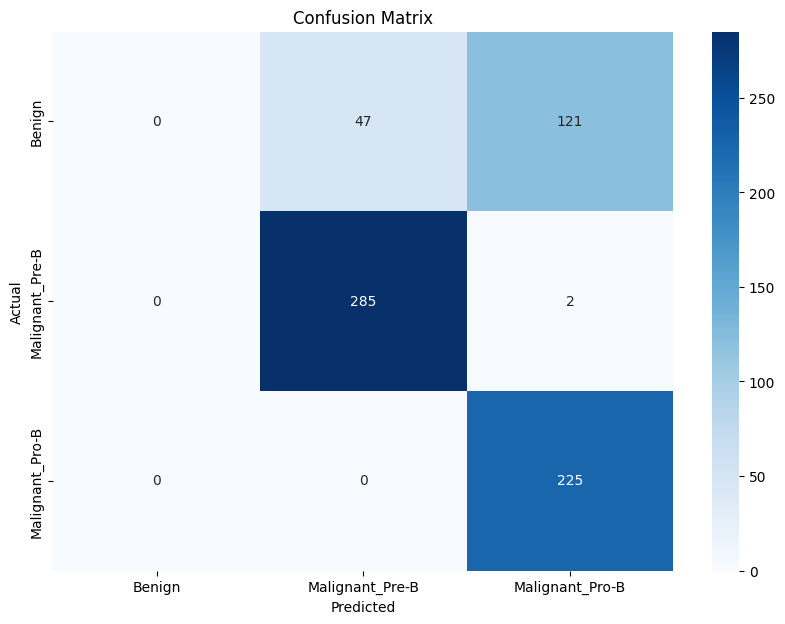

In [63]:
class_labels = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B']


cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Adjust the ticks to match the number of labels
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()